# Q1 - Q3

In [18]:
from sklearn.datasets import load_wine
features, labels = load_wine(as_frame = True, return_X_y = True)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, random_state = 1,
                                                                    test_size = 0.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier
DtClf = DecisionTreeClassifier(random_state = 1)
ParGrid1 = {
    'criterion': ['entropy','gini'],
    'splitter': ['random','best'],
    'min_samples_leaf': [2,4,6,8,10],
    'max_depth': [3, 4, 5, 6],
}
gscv1 = GridSearchCV(DtClf, ParGrid1, cv = 4)
gscv1.fit(train_data, train_labels)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [21]:
print(f'Test data score: {gscv1.score(test_data, test_labels)}')

Test data score: 0.9074074074074074


In [22]:
print(f'Best Parameter values: {gscv1.best_params_}')

Best Parameter values: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}


# Common Data for Q4 - Q10

In [23]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(as_frame = True, return_X_y = True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

## Q4 - Q7

In [25]:
from sklearn.tree import DecisionTreeRegressor
DtReg1 = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random', max_leaf_nodes = 10,
                               random_state = 1)
DtReg1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [26]:
print(f'Training Data score: {DtReg1.score(X_train, y_train)}')
print(f'Test Data score: {DtReg1.score(X_test, y_test)}')

Training Data score: 0.5032060624566737
Test Data score: 0.218771375137222


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= -0.045\nsquared_error = 6302.895\nsamples = 309\nvalue = 154.065'),
 Text(0.23076923076923078, 0.7857142857142857, 'squared_error = 1343.27\nsamples = 48\nvalue = 89.646'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= -0.008\nsquared_error = 6311.475\nsamples = 261\nvalue = 165.912'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[7] <= 0.025\nsquared_error = 3253.924\nsamples = 96\nvalue = 115.615'),
 Text(0.07692307692307693, 0.5, 'squared_error = 2446.901\nsamples = 72\nvalue = 101.625'),
 Text(0.23076923076923078, 0.5, 'squared_error = 3326.493\nsamples = 24\nvalue = 157.583'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[8] <= -0.005\nsquared_error = 5762.145\nsamples = 165\nvalue = 195.176'),
 Text(0.38461538461538464, 0.5, 'x[6] <= -0.016\nsquared_error = 4794.095\nsamples = 47\nvalue = 148.106'),
 Text(0.3076923076923077, 0.35714285714285715, 'squared_error = 2804.102\nsamples = 14\nvalue = 192.429'),
 Tex

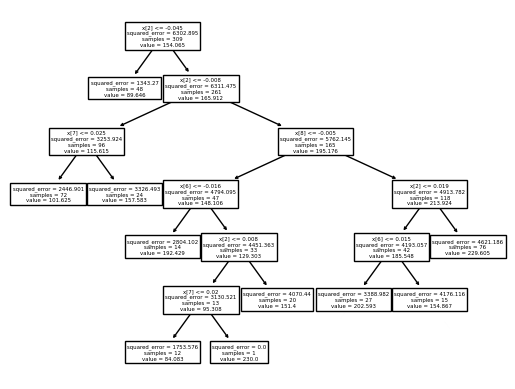

In [28]:
from sklearn.tree import plot_tree
plot_tree(DtReg1)

In [29]:
LeftSamples = 48
RightSamples = 261
print(f'Ratio: {LeftSamples/RightSamples}')

Ratio: 0.1839080459770115


## Q8 - Q10

In [30]:
DtReg2 = DecisionTreeRegressor(max_depth = 4, random_state = 1)
ParGrid2 = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['random','best'],
    'max_features': [4,5,6,'sqrt', 'log2'],
    'ccp_alpha': [0.001,0.01,0.02,0.05]
}
gscv2 = GridSearchCV(DtReg2, ParGrid2, cv = 4)

In [31]:
gscv2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': [4, 5, 6, 'sqrt', 'log2'],
                         'splitter': ['random', 'best']})

In [32]:
gscv2.score(X_test, y_test)

0.2276927113007854

In [33]:
gscv2.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'squared_error',
 'max_features': 5,
 'splitter': 'random'}